# CQI Time-Series Forecasting

## Literature

## Imports

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose


## Data Loading

In [3]:
df = pd.read_csv("./data/ue-lte-network-traffic-stats.csv")
df.head()

,UE1: web-rtc,UE1: sipp,UE1: web-server,UE2: web-rtc,UE2: sipp,UE2: web-server,UE3: web-rtc,UE3: sipp,UE3: web-server,UE1-Jitter,UE2-Jitter,UE3-Jitter,UE1-CQI,UE2-CQI,UE3-CQI
0,16360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026981,0.0,0.0,15.0,10.0,12.0
1,1905.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005916,0.0,0.0,13.0,12.0,15.0
2,20021.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015945,0.0,0.0,12.0,15.0,15.0
3,33617.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030872,0.0,0.0,11.0,14.0,15.0
4,50102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035999,0.0,0.0,15.0,14.0,14.0


## Pre-Processing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48600 entries, 0 to 48599
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UE1: web-rtc     48600 non-null  float64
 1   UE1: sipp        48600 non-null  float64
 2   UE1: web-server  48600 non-null  float64
 3   UE2: web-rtc     48600 non-null  float64
 4   UE2: sipp        48600 non-null  float64
 5   UE2: web-server  48600 non-null  float64
 6   UE3: web-rtc     48600 non-null  float64
 7   UE3: sipp        48600 non-null  float64
 8   UE3: web-server  48600 non-null  float64
 9   UE1-Jitter       48600 non-null  float64
 10  UE2-Jitter       48600 non-null  float64
 11  UE3-Jitter       48600 non-null  float64
 12  UE1-CQI          48600 non-null  float64
 13  UE2-CQI          48600 non-null  float64
 14  UE3-CQI          48600 non-null  float64
dtypes: float64(15)
memory usage: 5.6 MB


In [6]:
df.shape

(48600, 15)

In [12]:
daily_TS = []

In [13]:
day_samples = 3600
for i in range(day_samples, df.shape[0],day_samples):
    daily_TS.append(df[i-day_samples: i])

In [14]:
for d in daily_TS:
    print(d.shape)

(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)
(3600, 15)


In [16]:
len(daily_TS)

13

In [23]:
#reindexing
for i in range(len(daily_TS)):
    daily_TS[i] = daily_TS[i].reset_index()

In [24]:
daily_TS[1]

,index,UE1: web-rtc,UE1: sipp,UE1: web-server,UE2: web-rtc,UE2: sipp,UE2: web-server,UE3: web-rtc,UE3: sipp,UE3: web-server,UE1-Jitter,UE2-Jitter,UE3-Jitter,UE1-CQI,UE2-CQI,UE3-CQI
0,3600,9249.0,0.0,0.0,0.0,17803.0,0.0,0.0,0.0,0.0,0.008380,0.015369,0.0000,5.0,7.0,15.0
1,3601,9758.0,0.0,0.0,0.0,30818.0,0.0,0.0,0.0,0.0,0.020158,0.007954,0.0000,5.0,8.0,13.0
2,3602,20638.0,0.0,0.0,0.0,26067.0,0.0,0.0,0.0,0.0,0.015436,0.023392,0.0000,15.0,3.0,12.0
3,3603,32920.0,0.0,0.0,0.0,21358.0,0.0,0.0,0.0,0.0,0.027082,0.015842,0.0000,11.0,10.0,15.0
4,3604,16864.0,0.0,0.0,0.0,23056.0,0.0,0.0,0.0,0.0,0.022839,0.018144,0.0000,7.0,11.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,7195,28557.0,0.0,0.0,0.0,29907.0,0.0,0.0,0.0,0.0,0.037887,0.006507,0.0000,14.0,10.0,15.0
3596,7196,30264.0,0.0,0.0,0.0,18979.0,0.0,0.0,0.0,0.0,0.034205,0.020819,0.0000,7.0,8.0,15.0
3597,7197,21832.0,0.0,0.0,0.0,36895.0,0.0,0.0,0.0,0.0,0.037409,0.022285,0.0000,7.0,12.0,15.0
3598,7198,9077.0,0.0,0.0,0.0,23500.0,0.0,0.0,0.0,0.0,0.026559,0.015060,0.0000,7.0,13.0,15.0


## Exploratory Analysis

### Correlation

In [28]:
df.corr()

,UE1: web-rtc,UE1: sipp,UE1: web-server,UE2: web-rtc,UE2: sipp,UE2: web-server,UE3: web-rtc,UE3: sipp,UE3: web-server,UE1-Jitter,UE2-Jitter,UE3-Jitter,UE1-CQI,UE2-CQI,UE3-CQI
UE1: web-rtc,1.000000,NaN,-0.328186,-0.433476,0.418185,NaN,-0.265253,NaN,-0.242626,0.435580,-0.141789,-0.403526,0.073775,0.011858,0.190266
UE1: sipp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UE1: web-server,-0.328186,NaN,1.000000,0.273150,-0.021553,NaN,0.223742,NaN,0.134811,0.056765,0.140956,0.405971,-0.109060,-0.037797,-0.166680
UE2: web-rtc,-0.433476,NaN,0.273150,1.000000,-0.478422,NaN,-0.211203,NaN,0.655387,-0.359907,0.171695,0.390997,0.020301,0.124215,-0.216581
UE2: sipp,0.418185,NaN,-0.021553,-0.478422,1.000000,NaN,-0.008879,NaN,-0.339125,0.403580,0.224457,-0.213448,-0.314453,-0.310012,0.214926
UE2: web-server,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UE3: web-rtc,-0.265253,NaN,0.223742,-0.211203,-0.008879,NaN,1.000000,NaN,-0.117554,-0.182754,-0.060474,0.456847,-0.291159,-0.277392,0.099607
UE3: sipp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UE3: web-server,-0.242626,NaN,0.134811,0.655387,-0.339125,NaN,-0.117554,NaN,1.000000,-0.258048,0.121240,0.558302,-0.023013,0.037502,-0.105065
UE1-Jitter,0.435580,NaN,0.056765,-0.359907,0.403580,NaN,-0.182754,NaN,-0.258048,1.000000,-0.142989,-0.282704,-0.006947,-0.048685,0.106817


<AxesSubplot:>

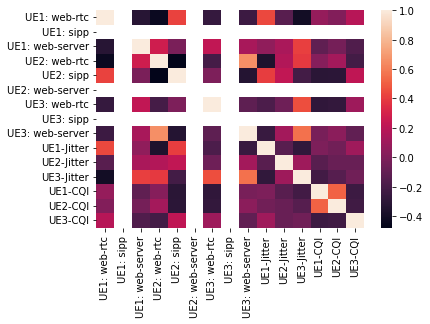

In [27]:
sns.heatmap(df.corr())

### Focusing on CQI

In [29]:
daily_CQI_TS = []
columns = ["UE1-CQI", "UE2-CQI", "UE3-CQI"]

for i in range(len(daily_TS)):
    daily_CQI_TS.append(daily_TS[i][columns])

In [30]:
daily_CQI_TS[0]

,UE1-CQI,UE2-CQI,UE3-CQI
0,15.0,10.0,12.0
1,13.0,12.0,15.0
2,12.0,15.0,15.0
3,11.0,14.0,15.0
4,15.0,14.0,14.0
...,...,...,...
3595,13.0,15.0,14.0
3596,15.0,9.0,11.0
3597,11.0,12.0,15.0
3598,9.0,10.0,10.0


### Statistics

In [31]:
df[columns].describe()

,UE1-CQI,UE2-CQI,UE3-CQI
count,48600.000000,48600.000000,48600.000000
mean,9.570782,11.441399,13.283868
std,3.420918,2.909377,2.364019
min,0.000000,0.000000,0.000000
25%,7.000000,9.000000,12.000000
50%,10.000000,12.000000,14.000000
75%,12.000000,14.000000,15.000000
max,15.000000,15.000000,15.000000


#### Daily Mean and Standard Deviation

In [32]:
means = []
stds = []

for ts in daily_CQI_TS:
  means.append(ts.mean())
  stds.append(ts.std())

In [33]:
means_per_day = {}
stds_per_day = {}

for col in columns:
  mm = []
  ss = []
  for i in range(len(means)):
    mm.append(means[i][col])
    ss.append(stds[i][col])

  means_per_day[col] = mm
  stds_per_day[col] = ss

In [34]:
days = [i for i in range(1,14)]

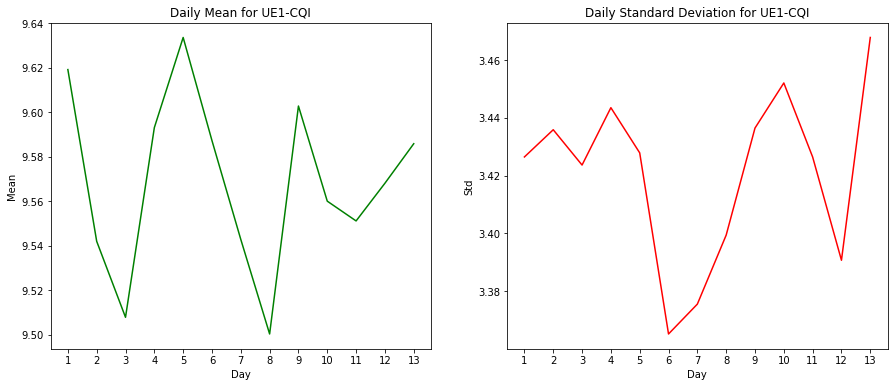

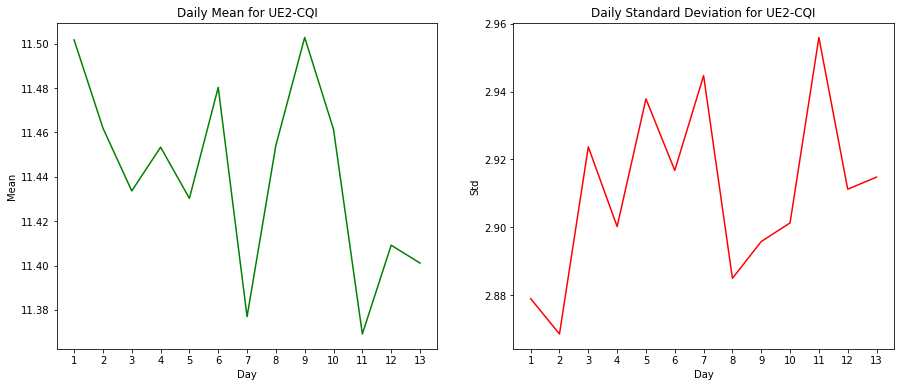

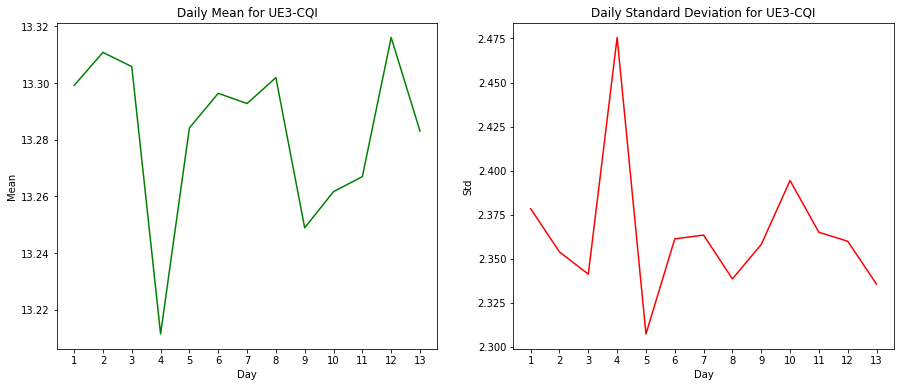

In [35]:
for col in columns:
  fig, ax = plt.subplots(1,2, figsize=(15,6))
  ax[0].plot(days, means_per_day[col], color="green")
  ax[0].set_xlabel("Day")
  ax[0].set_ylabel("Mean")
  ax[0].set_xticks(days)
  ax[0].set_title(f"Daily Mean for {col}")

  ax[1].plot(days, stds_per_day[col], color="red")
  ax[1].set_xlabel("Day")
  ax[1].set_ylabel("Std")
  ax[1].set_xticks(days)
  ax[1].set_title(f"Daily Standard Deviation for {col}")

### ACF & PCF

##### ACF

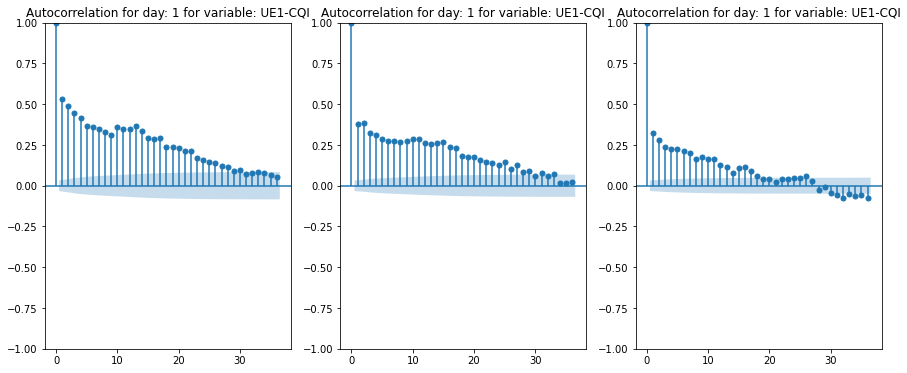

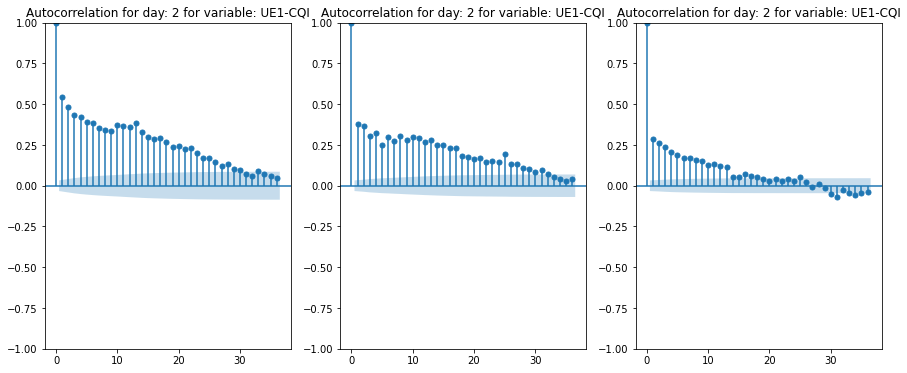

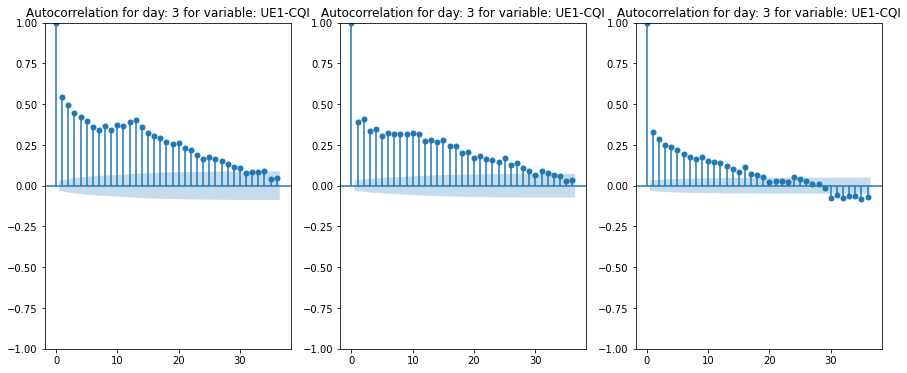

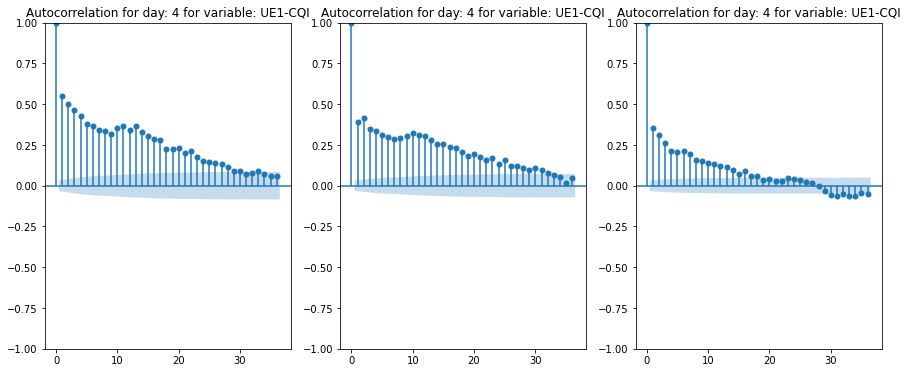

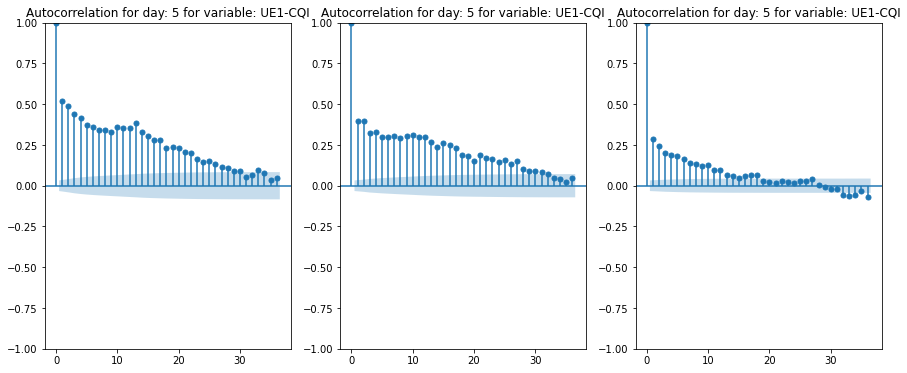

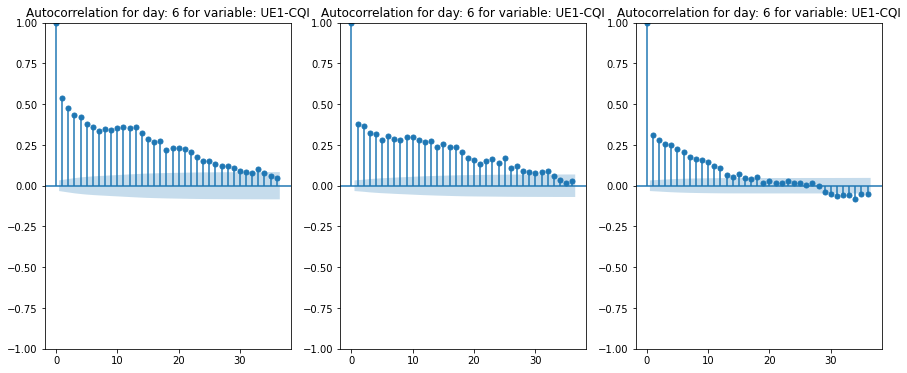

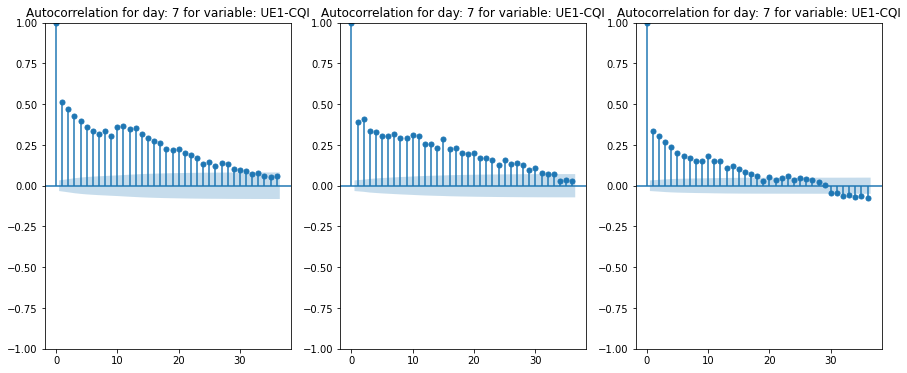

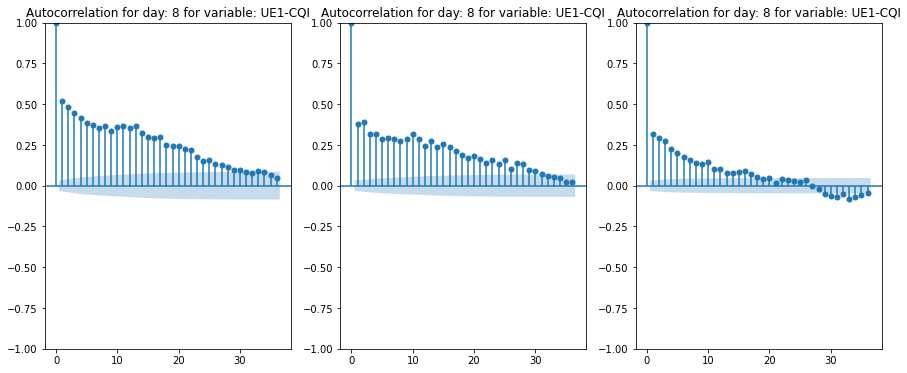

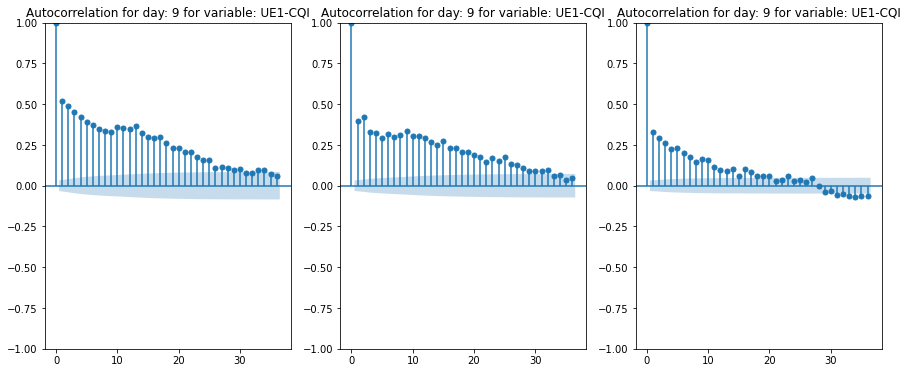

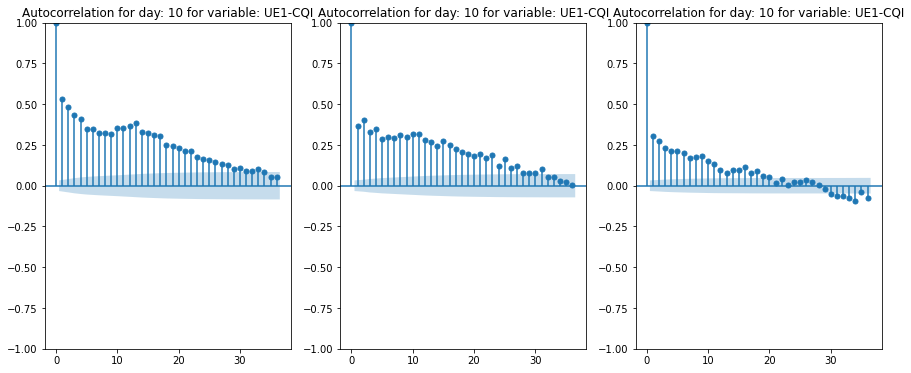

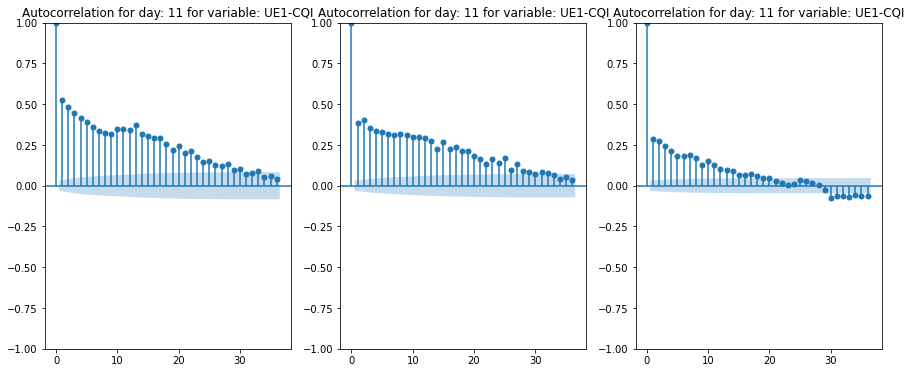

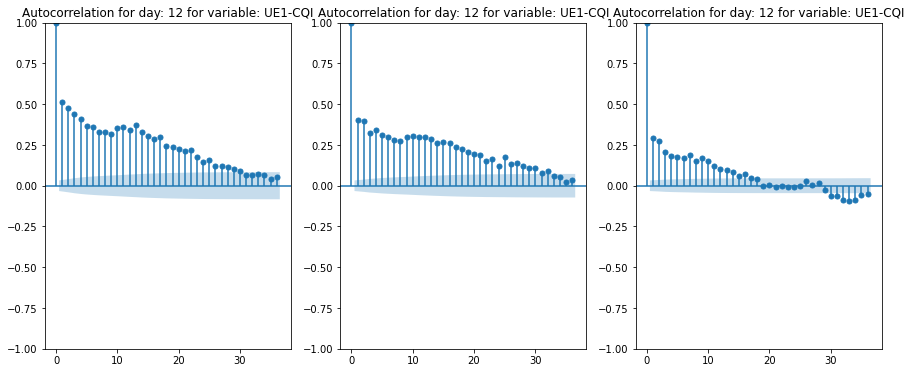

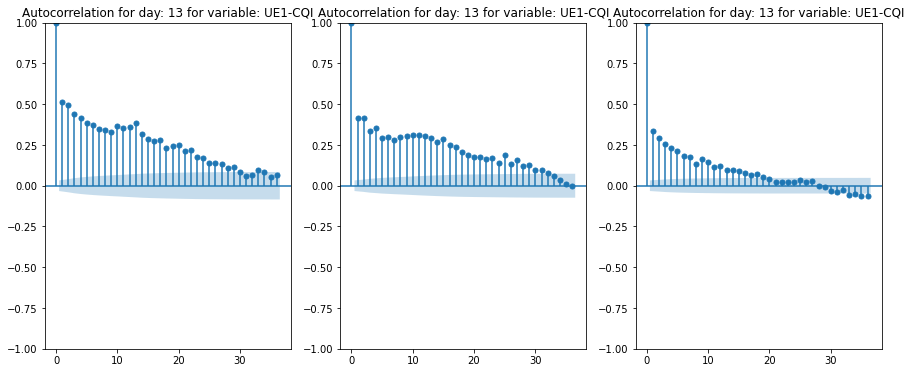

In [43]:
for i in range(13):
  fig, ax = plt.subplots(1,3, figsize=(15,6))
  for j in range(len(columns)):
    plot_acf(daily_CQI_TS[i][columns[j]],ax = ax[j],title=f'Autocorrelation for day: {i+1} for variable: {col}');

##### PACF

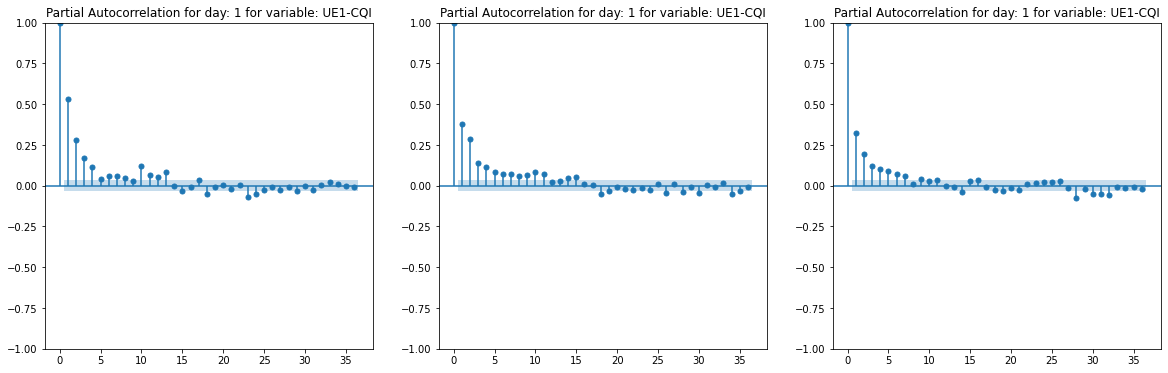

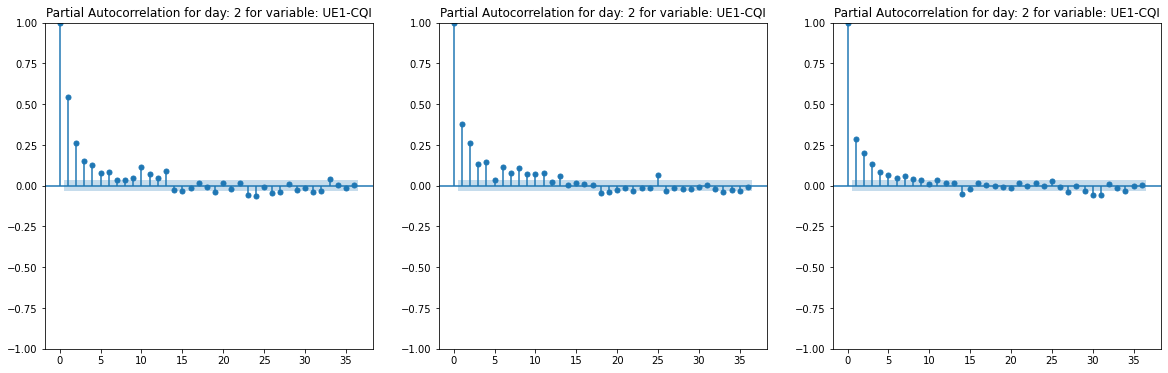

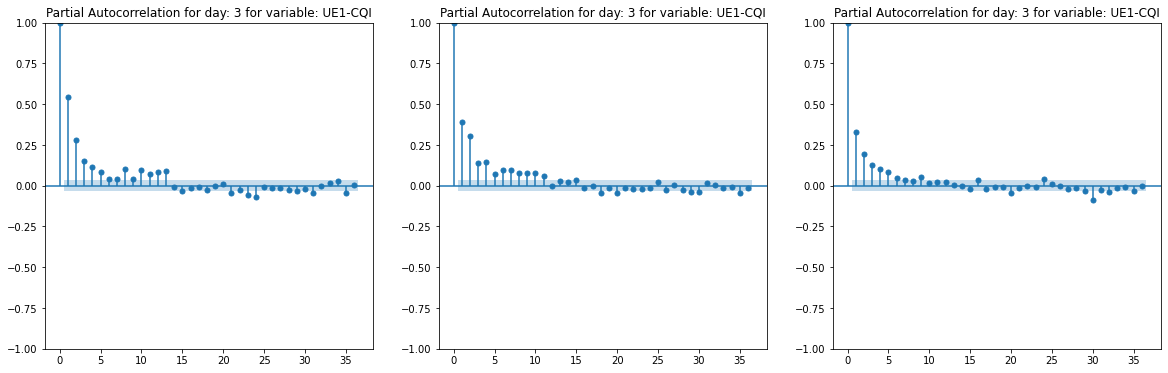

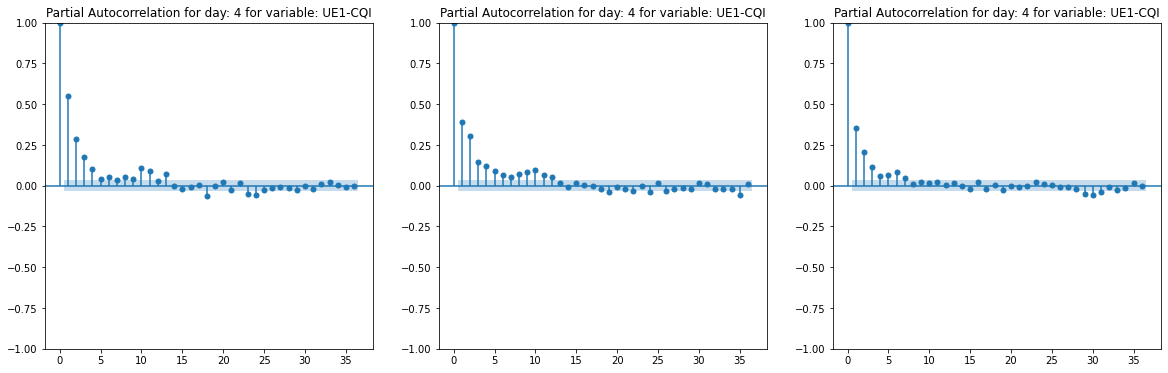

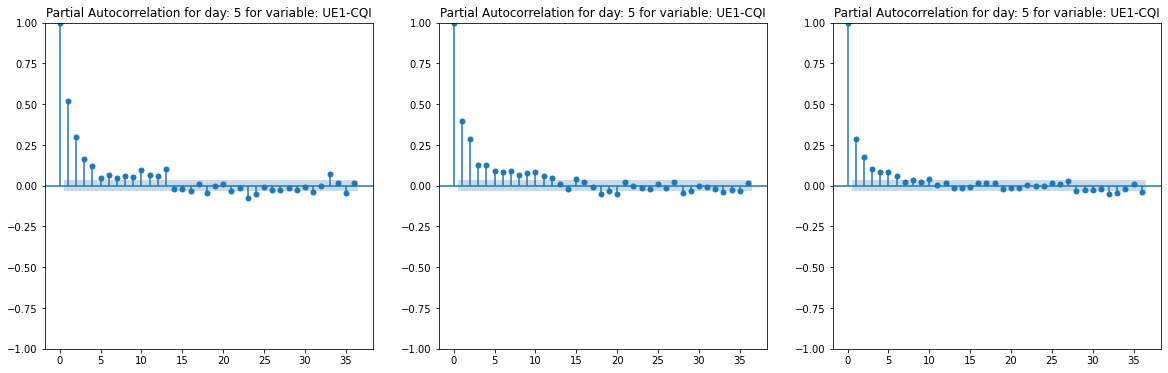

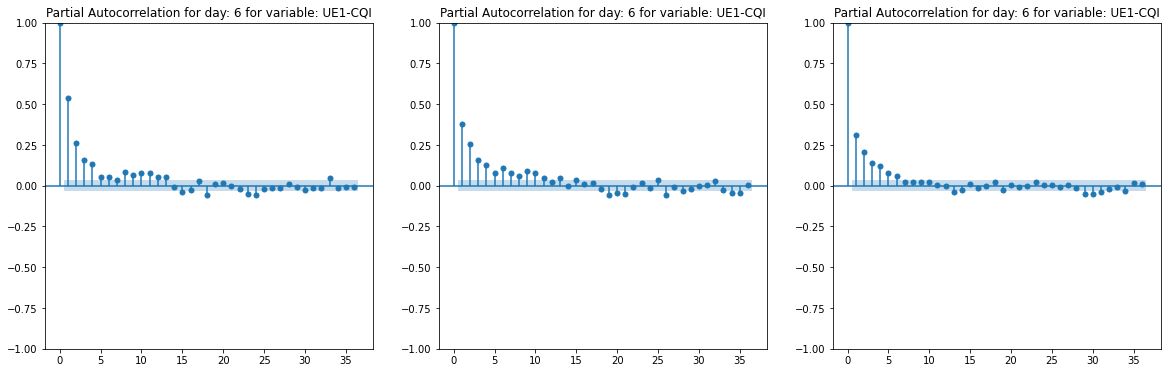

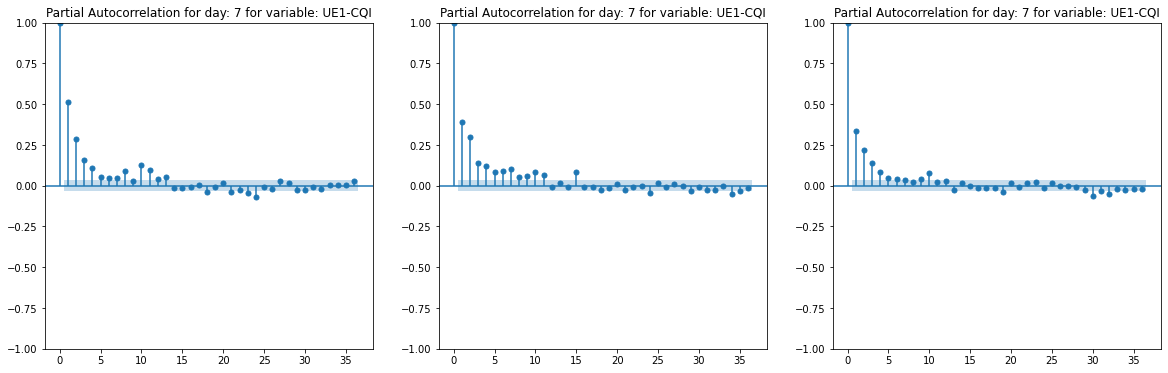

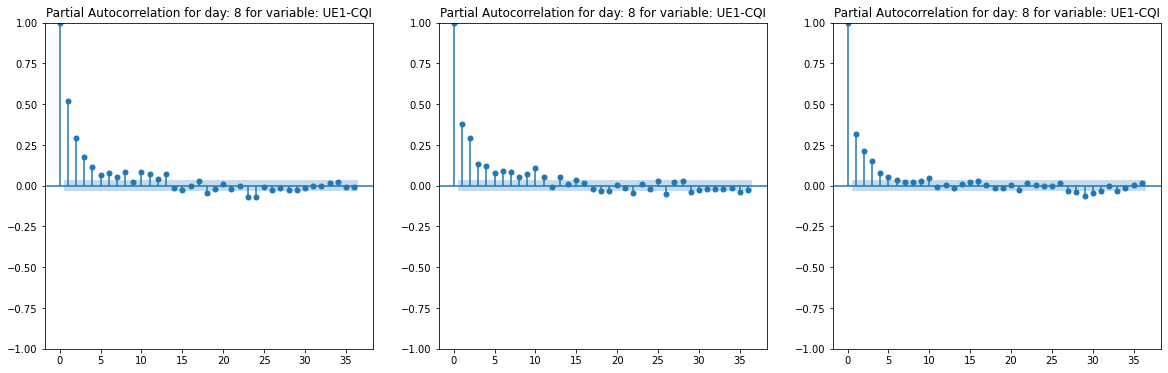

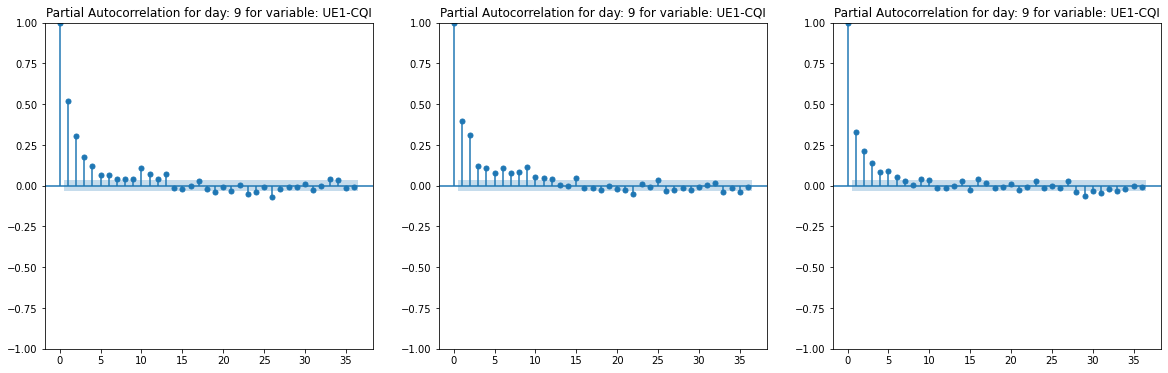

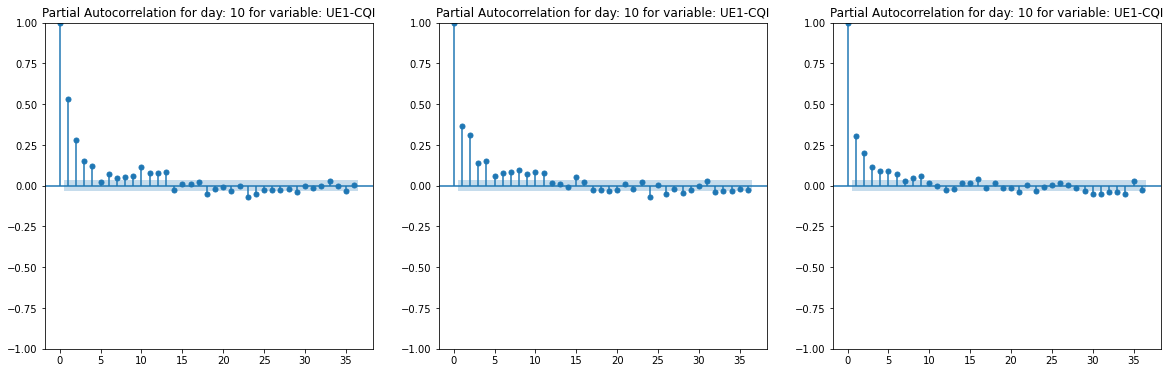

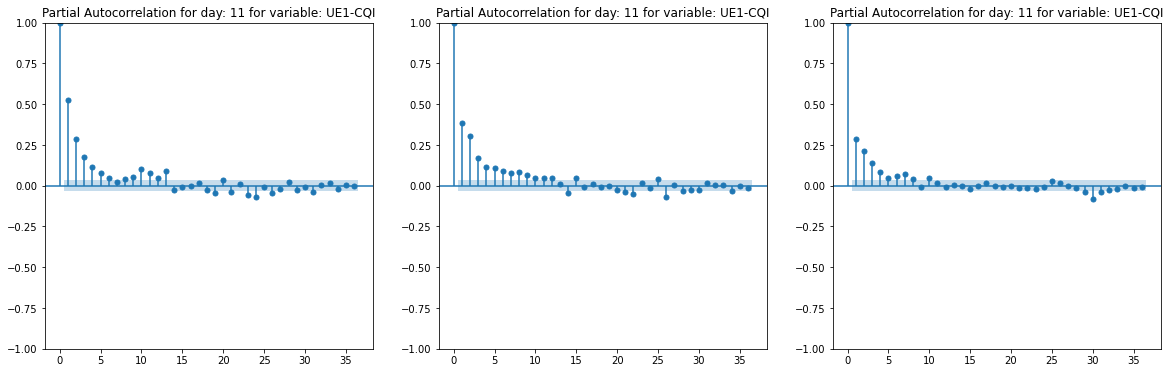

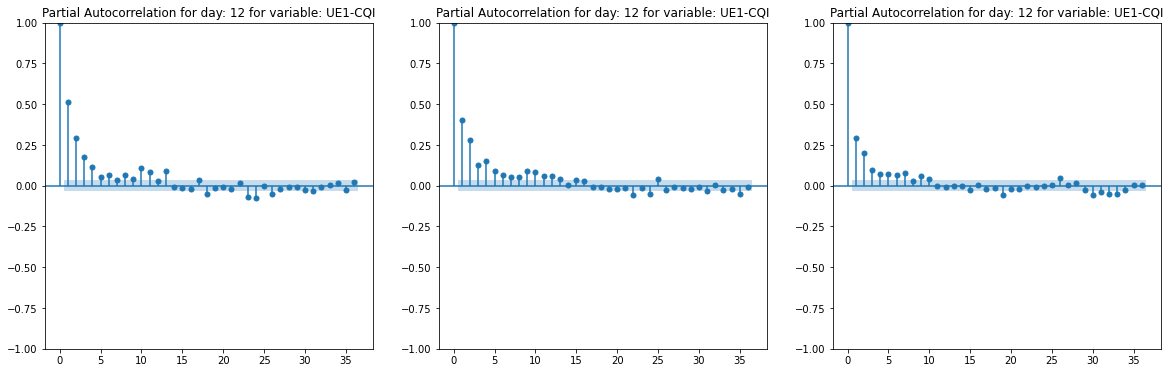

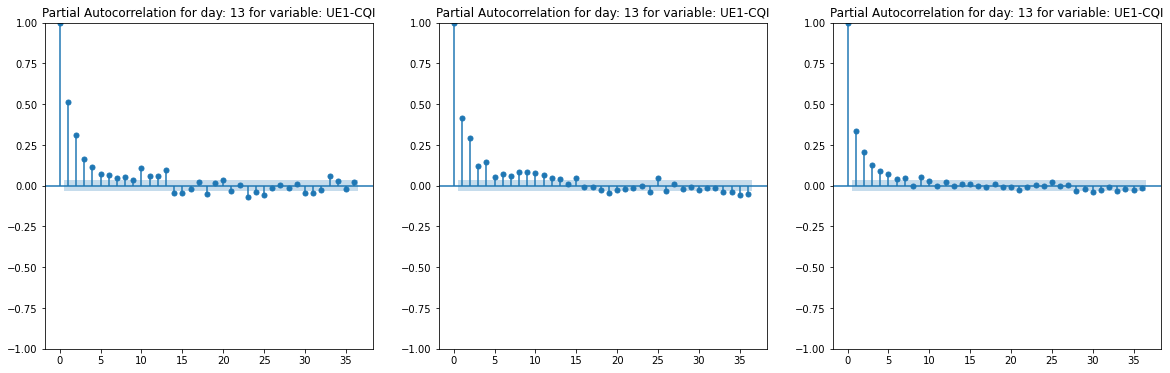

In [46]:
for i in range(13):
  fig, ax = plt.subplots(1,3, figsize=(20,6))
  for j in range(len(columns)):
    plot_pacf(daily_CQI_TS[i][columns[j]],ax = ax[j],title=f'Partial Autocorrelation for day: {i+1} for variable: {col}');

### Seasonlity, trend and residuals 

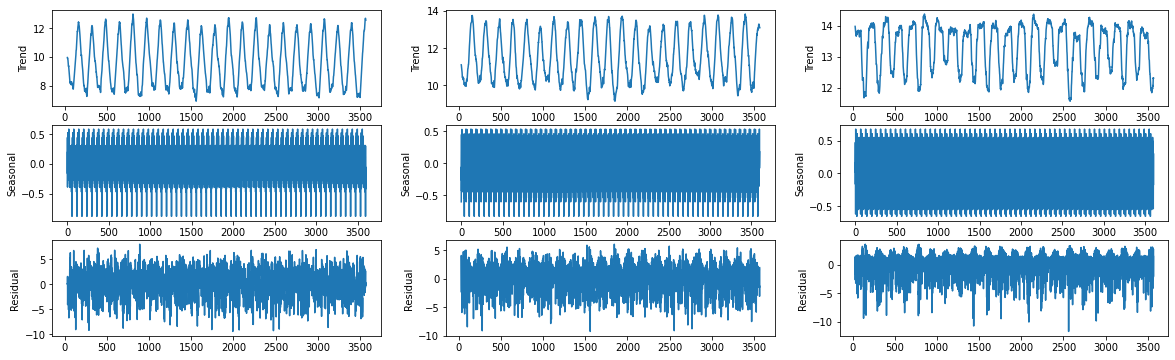

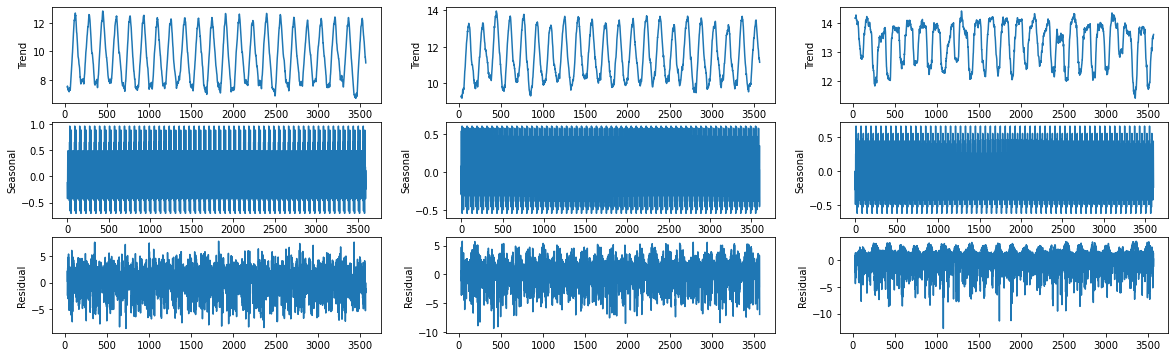

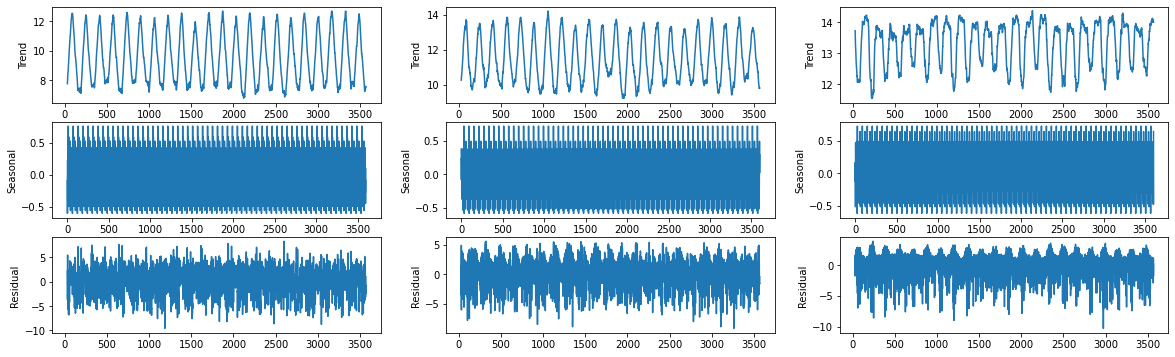

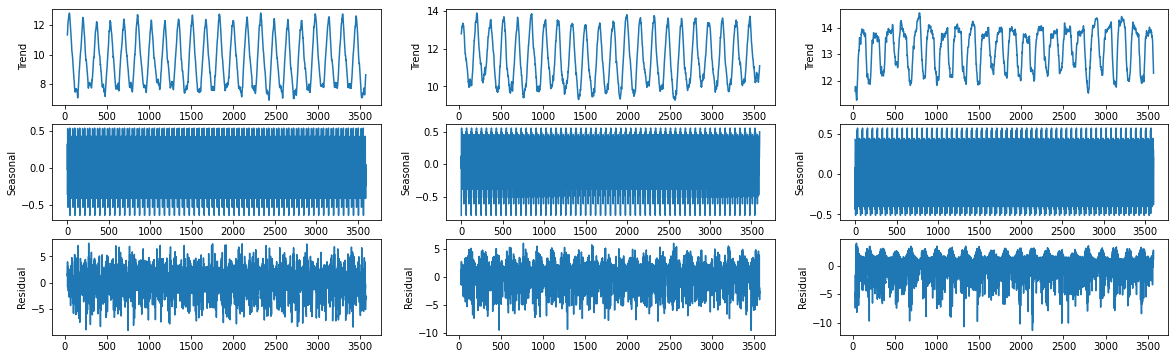

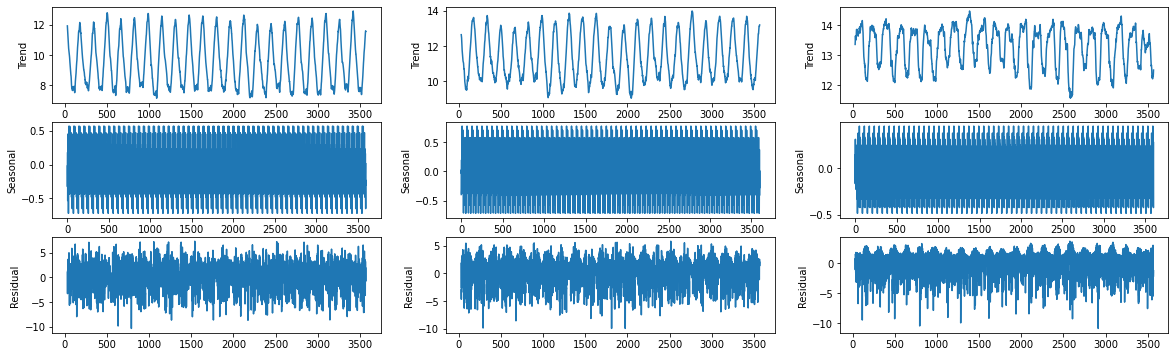

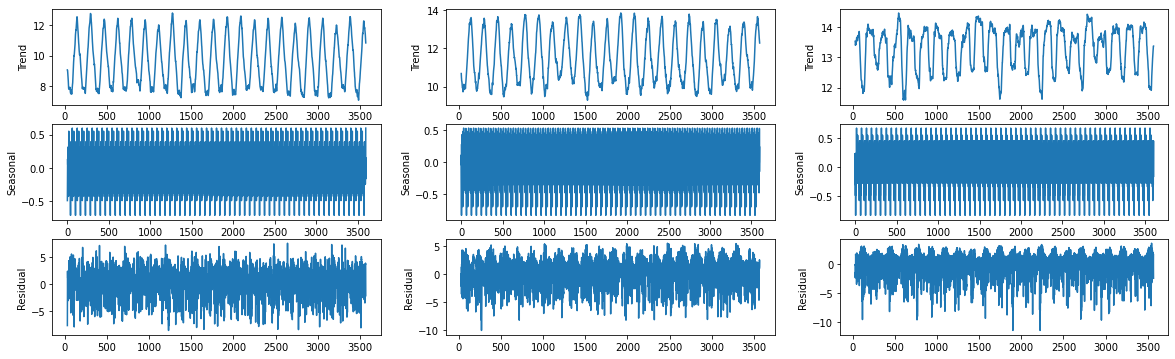

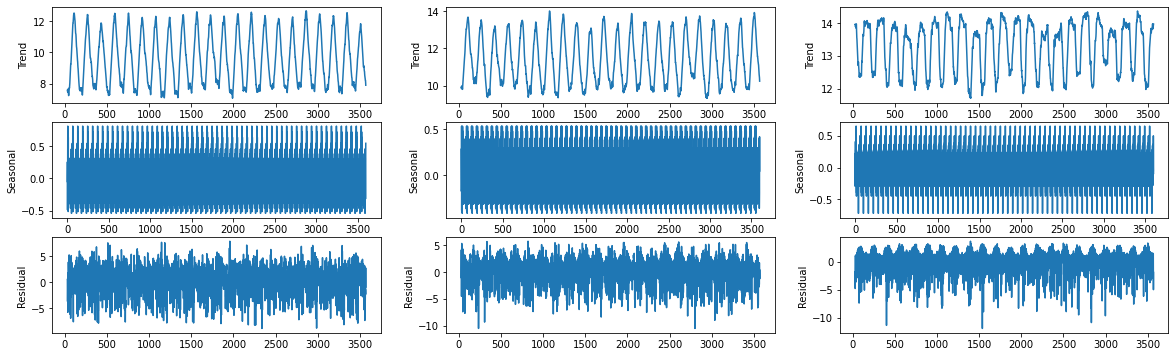

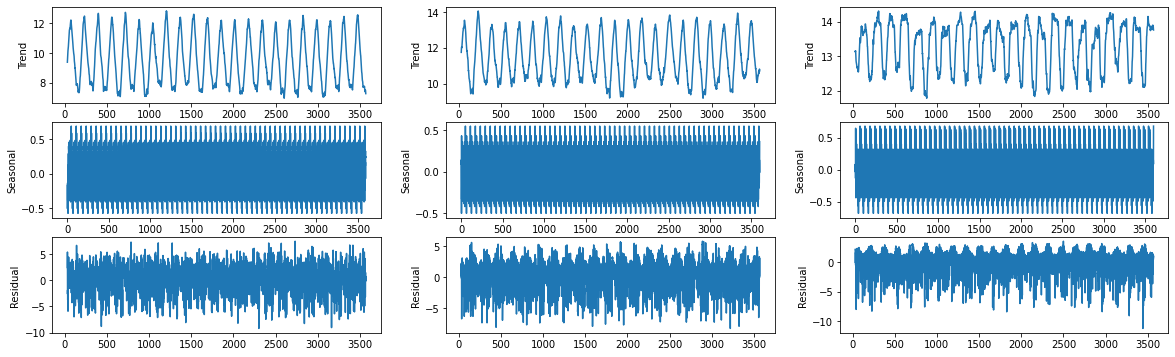

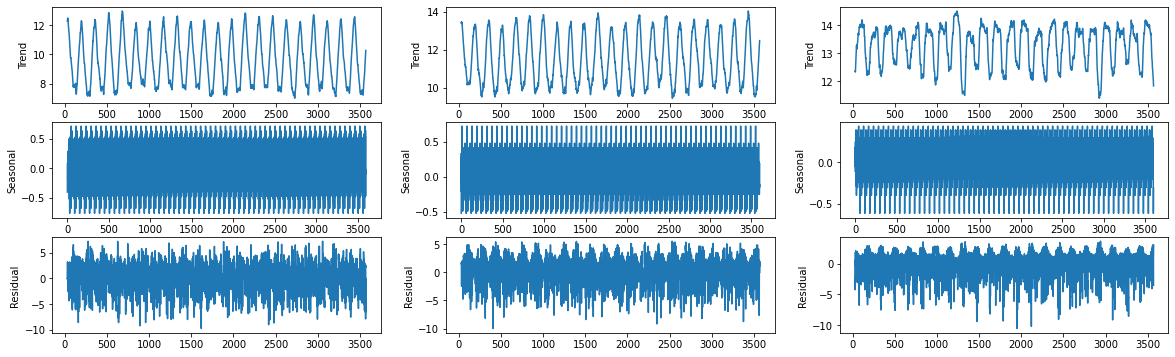

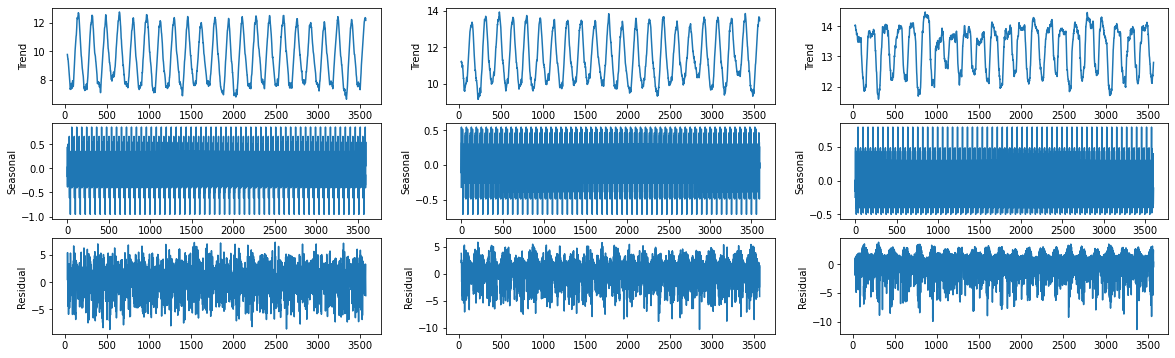

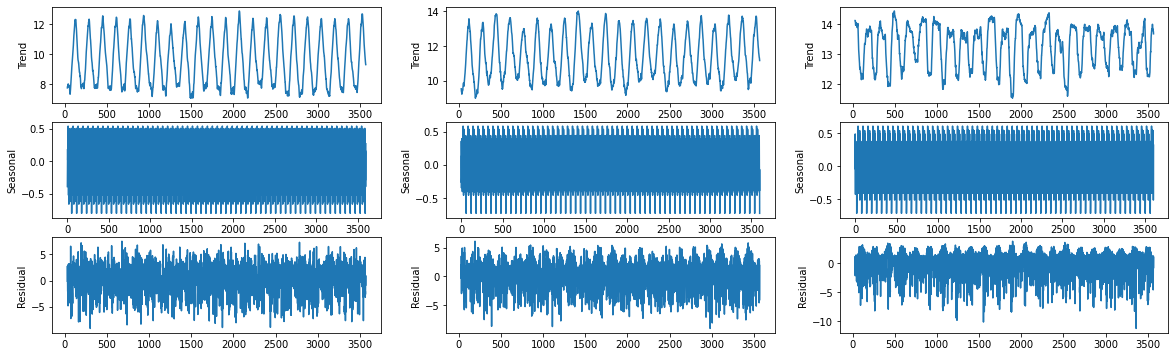

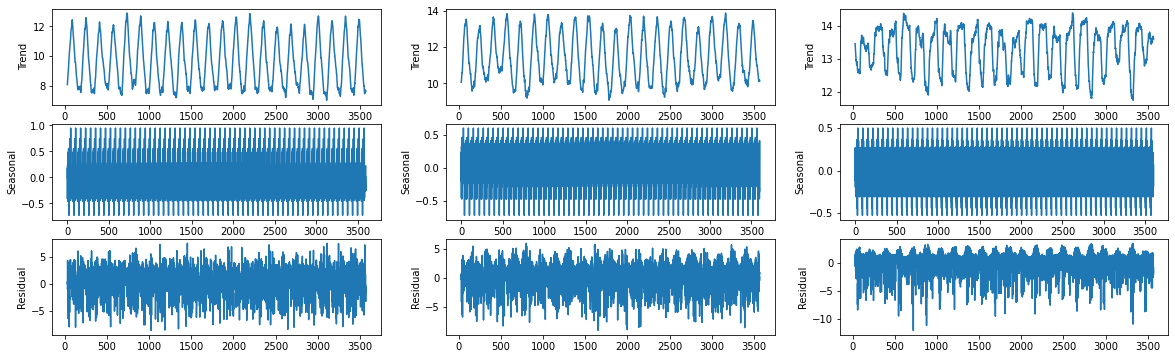

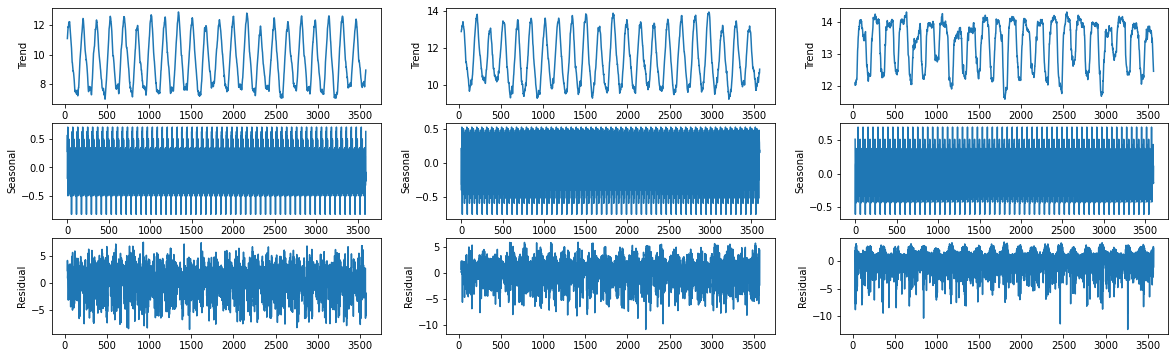

In [58]:
for i in range(13):
  fig, ax = plt.subplots(3,3, figsize=(20,6))
  
  for j in range(len(columns)):
    result = seasonal_decompose(daily_CQI_TS[i][columns[j]], period=60);
    result.trend.plot(ax=ax[0][j]);
    ax[0][j].set_ylabel('Trend')
    result.seasonal.plot(ax=ax[1][j]);
    ax[1][j].set_ylabel('Seasonal')
    result.resid.plot(ax=ax[2][j]);
    ax[2][j].set_ylabel('Residual')



## Modeling